In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2024
MAX_YEAR = 2124
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1393   | 6.755     | 9.638     | 3.694     |
| 4         | -0.03852  | 1.092     | 8.36      | 0.2536    |
| 44        | -0.02512  | 1.084     | 7.968     | 0.4347    |
| 81        | -0.01812  | 1.359     | 9.292     | 0.3315    |
Curve params found
{'push': 1.3592726389964758,
 'shift': 9.292445976308652,
 'slope': 0.33152764037838733}
-
## Chance of nonscaling delay ##


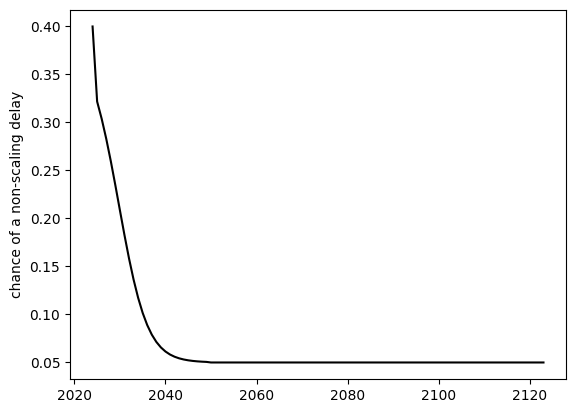

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 28%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2034

In [2]:
nonscaling_points = [(2024, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1887   | 2.567     | 6.196     | 5.103     |
| 3         | -0.1735   | 2.517     | 2.505     | 0.5372    |
| 21        | -0.1256   | 2.636     | 9.744     | 0.7337    |
| 42        | -0.125    | 0.01      | 8.297     | 8.099     |
| 43        | -0.09976  | 2.985     | 8.485     | 0.1993    |
| 64        | -0.08566  | 0.01      | 7.046     | 3.822     |
| 66        | -0.0532   | 0.01      | 8.185     | 3.503     |
| 108       | -0.04884  | 0.01      | 10.0      | 3.559     |
| 115       | -0.03792  | 0.01      | 7.599     | 3.304     |
Curve params found
{'push': 0.01, 'shift': 7.599255095721291, 'slope': 3.3041211245802256}
-
## Chance of nonscaling delay ##


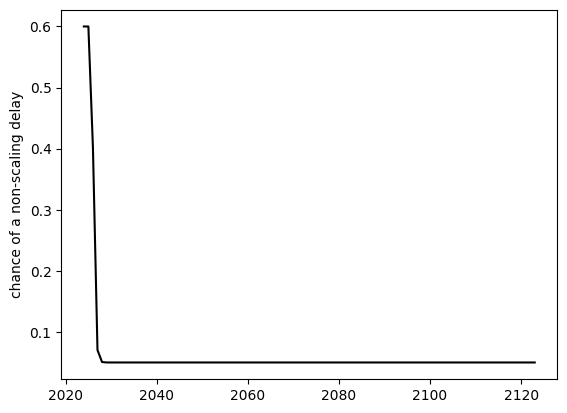

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chan

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.6),
                     (2026, 0.4),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.1538   | 1.038     | 4.933     | 1.102     |
| 34        | -0.15     | 0.08374   | 3.978     | 8.039     |
| 43        | -0.03828  | 0.01      | 4.134     | 1.432     |
| 44        | -0.0365   | 0.01      | 3.441     | 1.614     |
| 54        | -0.03468  | 0.05854   | 4.786     | 1.351     |
| 55        | -0.0336   | 0.01      | 4.862     | 1.93      |
| 60        | -0.02921  | 0.01      | 1.901     | 1.486     |
| 103       | -0.02889  | 0.01662   | 8.759     | 1.924     |
| 108       | -0.02876  | 0.02849   | 7.403     | 1.689     |
| 110       | -0.0281   | 0.0642    | 7.744     | 1.283     |
| 113       | -0.02366  | 0.04254   | 6.908     | 1.502     |
Curve params found
{'push': 0.042542206958530795,
 'shift': 6.908375815959094,
 'slope': 1.5017334258148194}
-
## Chance of nonscaling delay ##


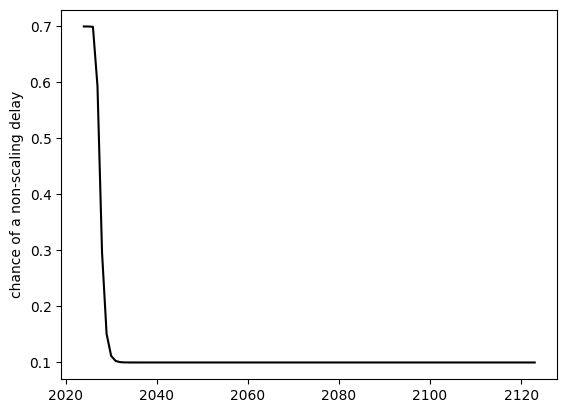

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 59%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 15%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2034

In [4]:
nonscaling_points = [(2024, 0.7),
                     (2027, 0.6),
                     (2030, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09559  | 7.425     | 9.402     | 3.8       |
| 3         | -0.07749  | 2.352     | 5.902     | 7.972     |
| 5         | -0.06604  | 1.312     | 4.955     | 4.449     |
| 18        | -0.05     | 0.1599    | 7.062     | 8.444     |
| 28        | -0.0387   | 0.07864   | 8.768     | 1.053     |
| 45        | -0.03593  | 0.01      | 7.559     | 0.6437    |
| 62        | -0.02339  | 0.01      | 8.098     | 1.214     |
Curve params found
{'push': 0.01, 'shift': 8.098099650112223, 'slope': 1.2138924878209885}
-
## Chance of nonscaling delay ##


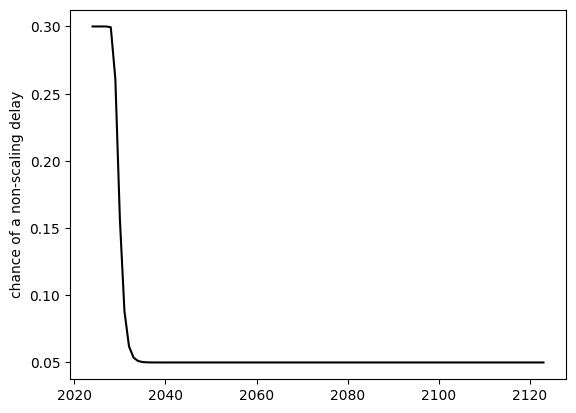

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - 

In [5]:
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.0934   | 1.019     | 0.4502    | 7.628     |
| 4         | -0.06728  | 1.422     | 5.217     | 1.636     |
| 10        | -0.06344  | 1.047     | 3.997     | 6.597     |
| 29        | -0.05265  | 0.4309    | 1.888     | 0.1036    |
| 35        | -0.04634  | 0.3779    | 8.445     | 0.9764    |
| 94        | -0.02396  | 0.03241   | 7.467     | 0.8314    |
Curve params found
{'push': 0.032413518747398146,
 'shift': 7.466824840344372,
 'slope': 0.8314235908833457}
-
## Chance of nonscaling delay ##


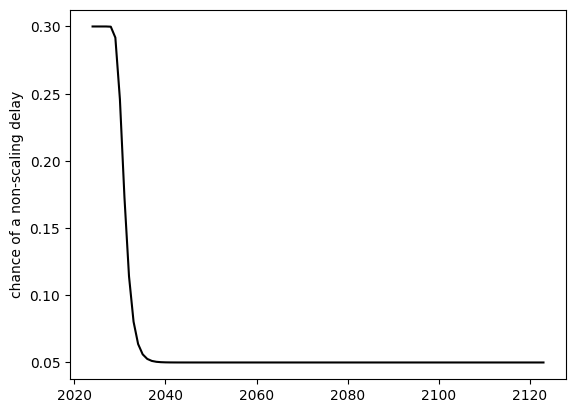

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2034 

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 17        | -0.01599  | 1.453     | 7.751     | 4.249     |
| 29        | -0.01172  | 0.8621    | 9.607     | 7.449     |
| 38        | -0.00994  | 0.0258    | 5.145     | 1.899     |
| 53        | -0.006267 | 0.01      | 3.609     | 1.297     |
| 101       | -0.001901 | 0.01      | 4.534     | 1.107     |
Curve params found
{'push': 0.01, 'shift': 4.533936077638703, 'slope': 1.1065948173170739}
-
## Chance of nonscaling delay ##


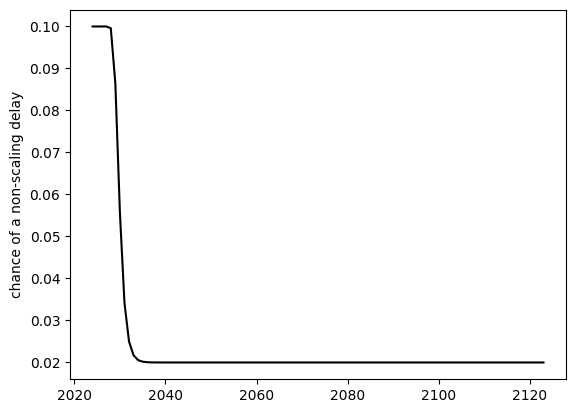

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2034 - ch

In [7]:
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2072   | 3.339     | 1.531     | 2.659     |
| 3         | -0.206    | 8.073     | 9.402     | 8.09      |
| 4         | -0.1757   | 2.399     | 4.134     | 2.258     |
| 16        | -0.1135   | 0.4163    | 6.381     | 7.401     |
| 26        | -0.1009   | 2.052     | 5.846     | 0.1566    |
| 45        | -0.09774  | 1.956     | 5.405     | 0.1474    |
Curve params found
{'push': 1.95646133036114,
 'shift': 5.4045336052087345,
 'slope': 0.1474347277882217}
-
## Chance of nonscaling delay ##


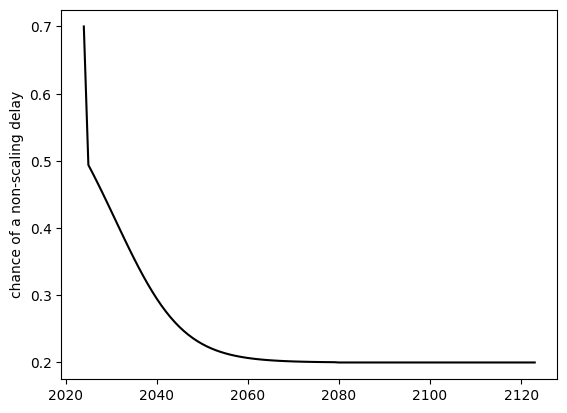

Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 48%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 47%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 45%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 44%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 43%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 41%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 38%
Year: 2034

In [8]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-03-15 12:30:55.275952
